In [1]:
import os
import re
import numpy as np
import scipy.io as sio
import imageio
import tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
# from utlis.projection import *                                 
from utlis.com_traga_utlis import load_data, plot_3d_trajectory, detect_jumps, generate_jump_video,generate_com_video #generate_com_video_choice#*
# from utlis.com_traga_utlis import plot_com_all, process_folders, temp_change_calib_pos_to_0, generate_dannce_vid_seq# *

In [2]:
# falure of trying, do not know why this cannot be passed....????
# base_folder = "/home/lq53/mir_data/24summ/2024_06_26/1686940_left"
# pred_folder = 'COM_df/predict_results/df_labels_240816_6comsets_continued'
# com_name = 'com3d.mat'
# generate_com_video_choice(base_folder, pred_folder, com_name,  cam='Camera4') #N_FRAMES=100, START_FRAME=0, cannot have it in function for some reson, otherwise will not work...

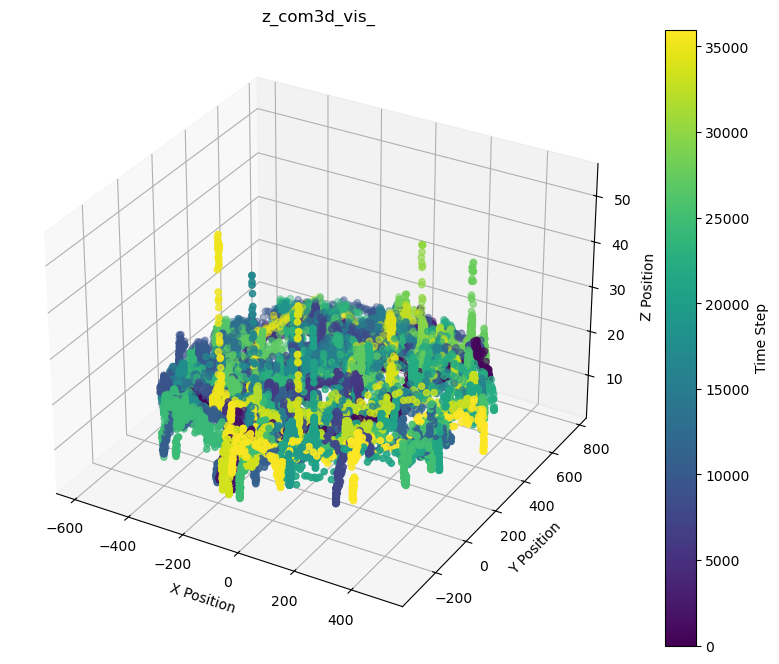

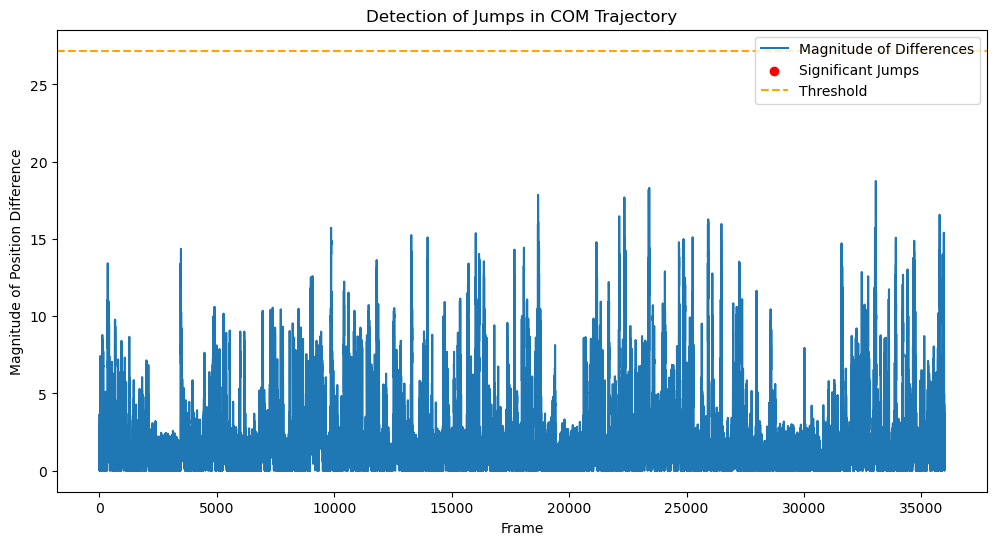

saved into npy. Frames with significant jumps: []
0
N_FRAMES 0


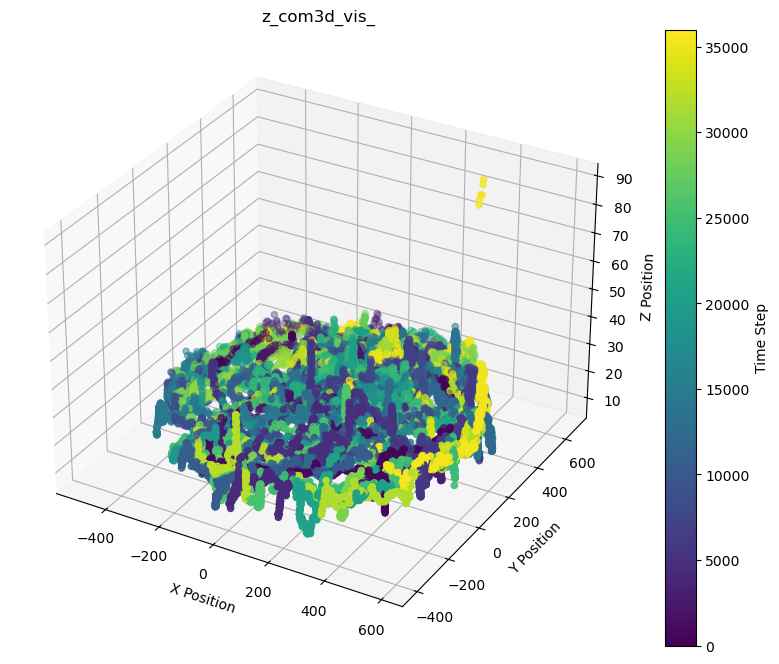

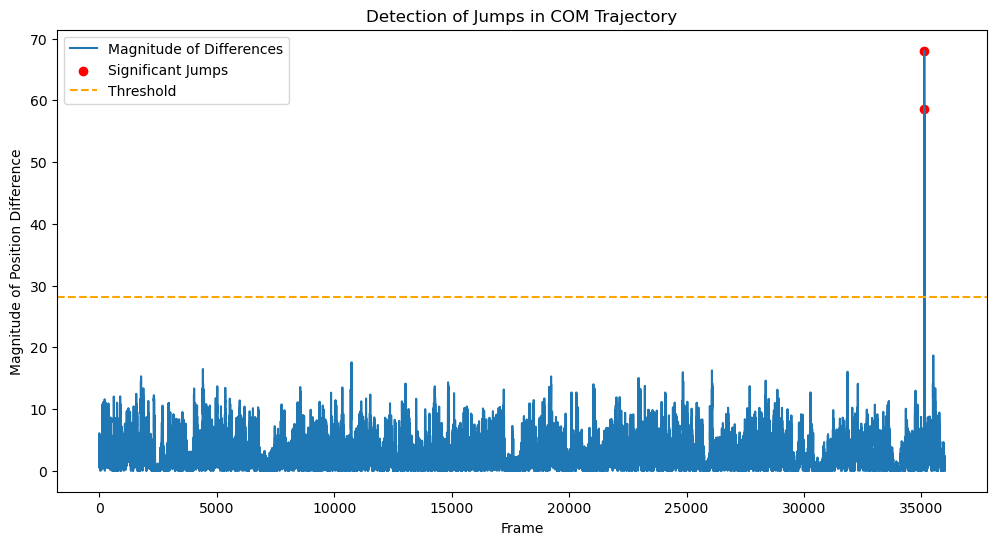

saved into npy. Frames with significant jumps: [35116 35122]
2
N_FRAMES 2
pred_2d 2


100%|██████████| 2/2 [00:02<00:00,  1.01s/it]


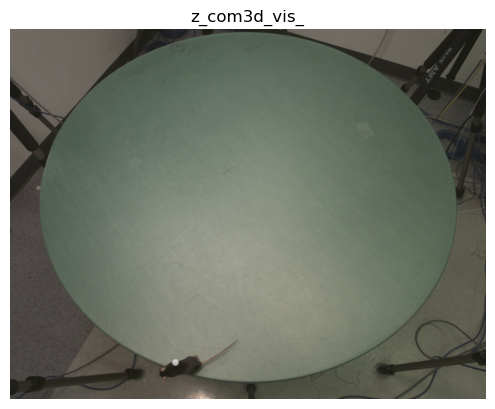

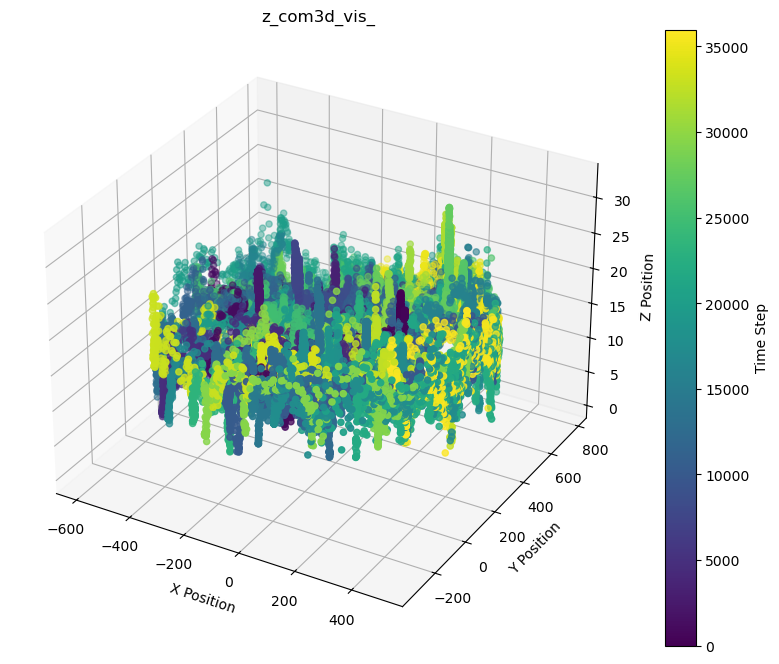

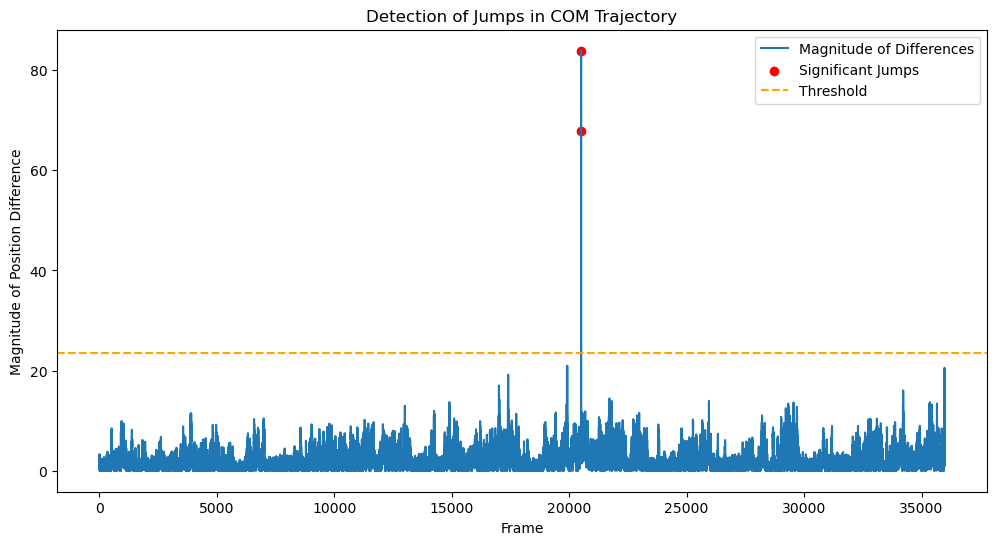

saved into npy. Frames with significant jumps: [20507 20508]
2
N_FRAMES 2
pred_2d 2


100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


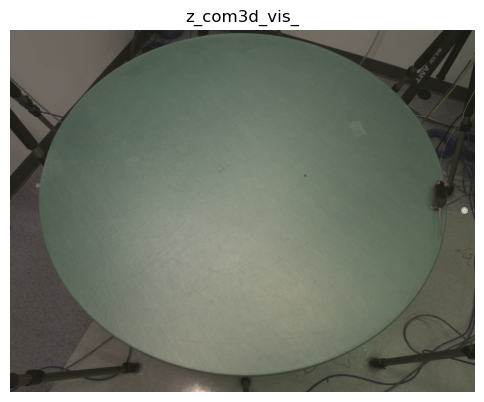

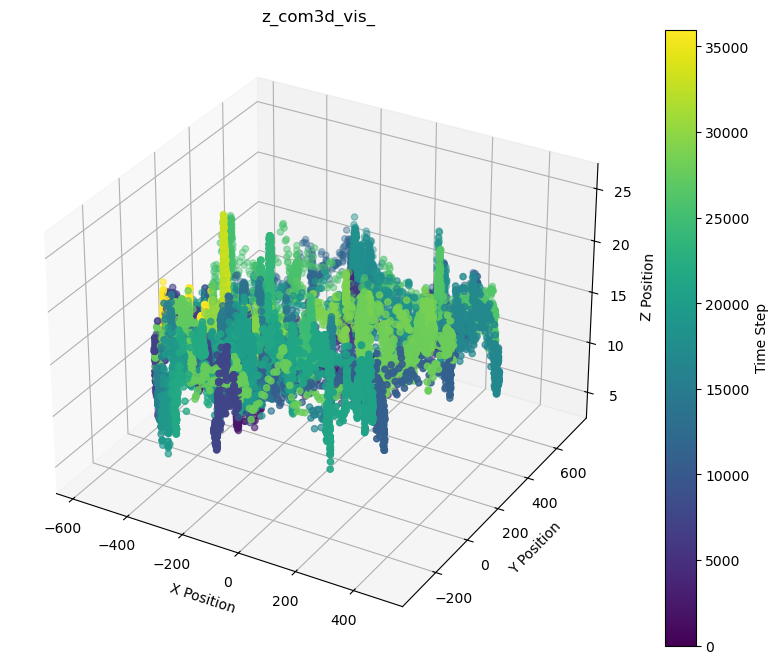

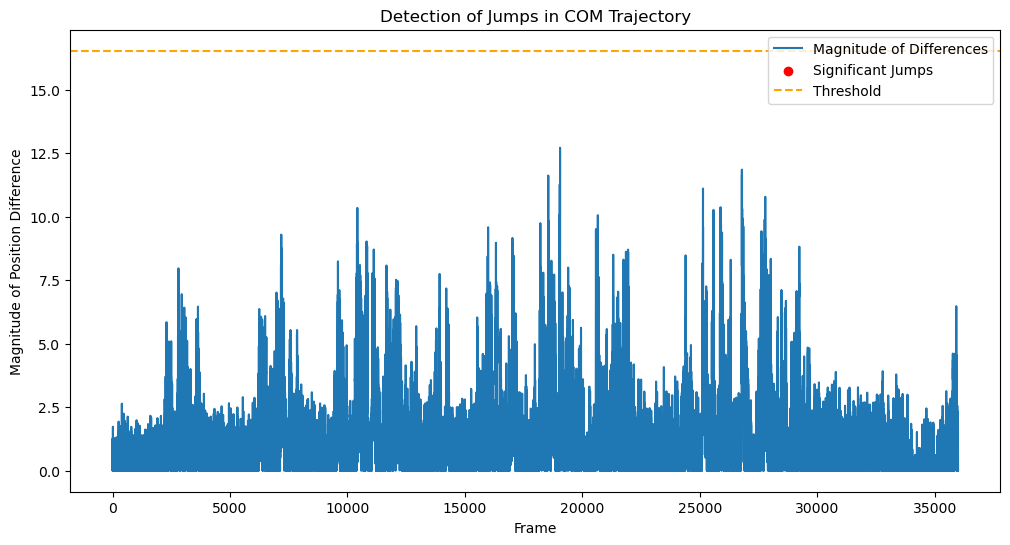

saved into npy. Frames with significant jumps: []
0
N_FRAMES 0


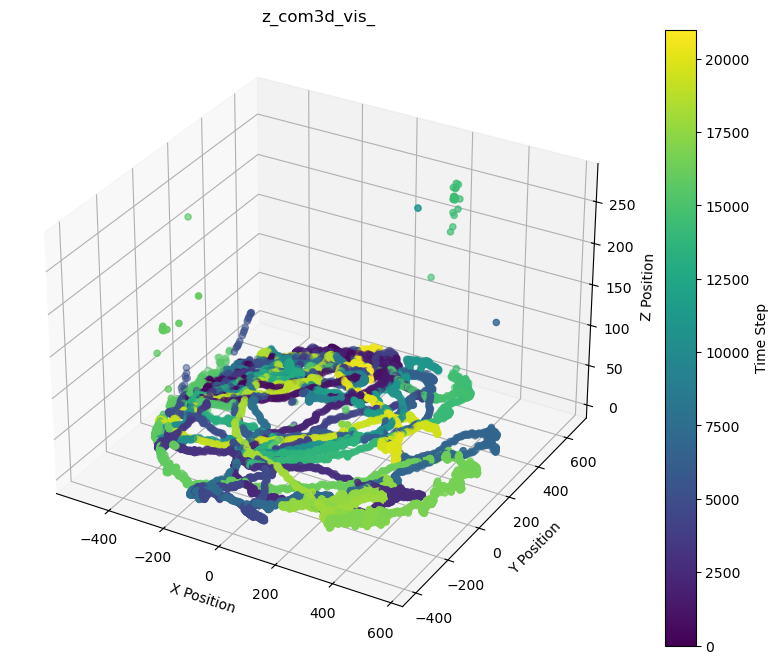

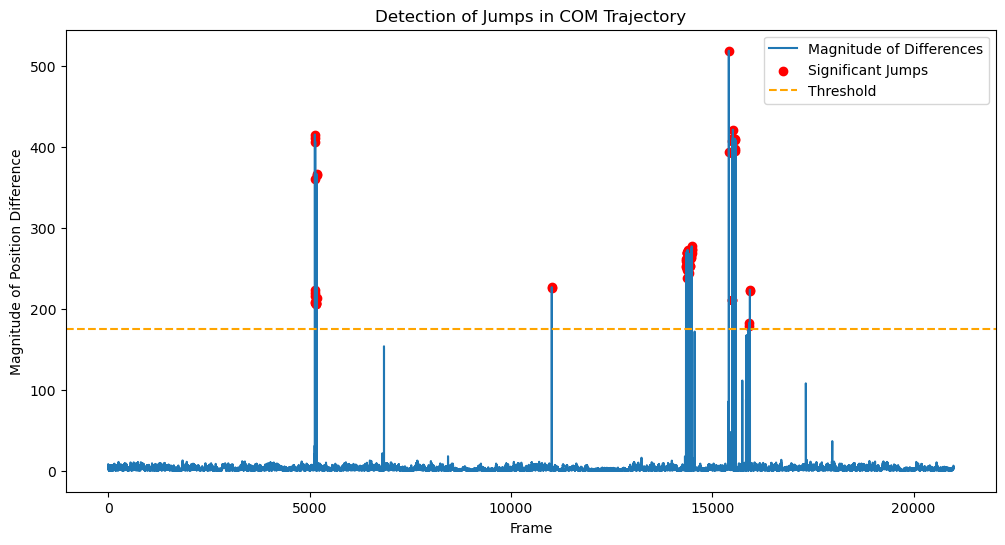

saved into npy. Frames with significant jumps: [ 5131  5133  5137  5138  5139  5141  5142  5143  5144  5164  5165  5167
  5169  5173  5174  5175 11012 11014 14347 14348 14358 14359 14360 14361
 14366 14367 14382 14383 14385 14386 14395 14397 14409 14410 14423 14429
 14430 14431 14445 14446 14447 14448 14459 14462 14475 14477 14484 14485
 14488 14489 15408 15410 15497 15498 15499 15500 15509 15512 15554 15557
 15560 15575 15921 15922 15933 15934]
66
N_FRAMES 66
pred_2d 66


100%|██████████| 66/66 [00:27<00:00,  2.40it/s]


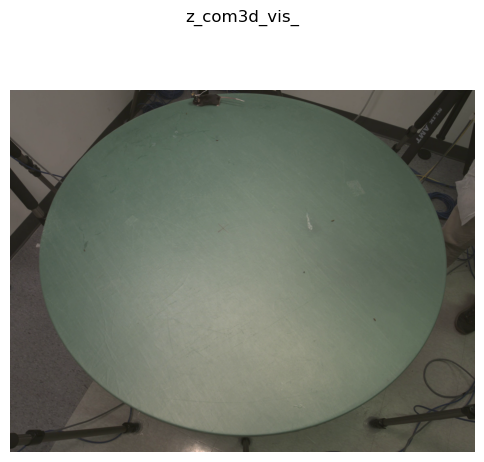

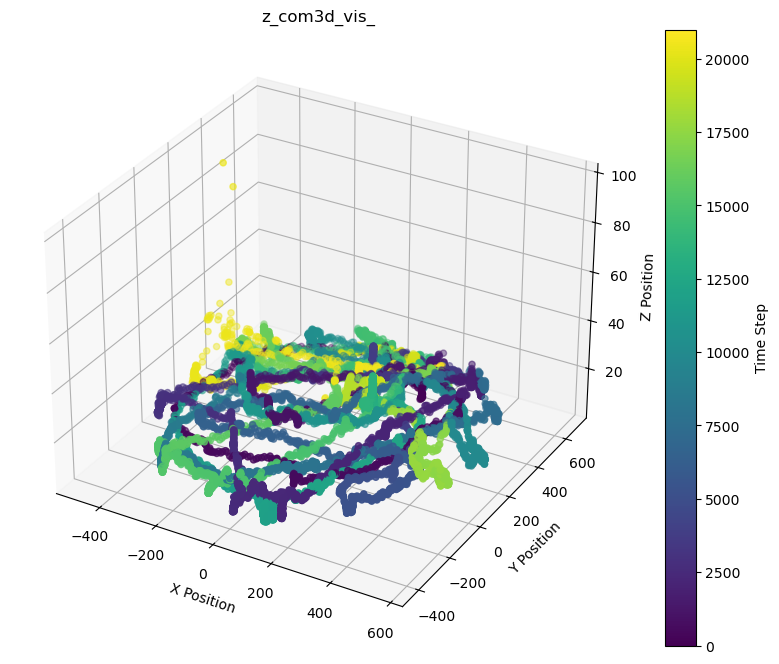

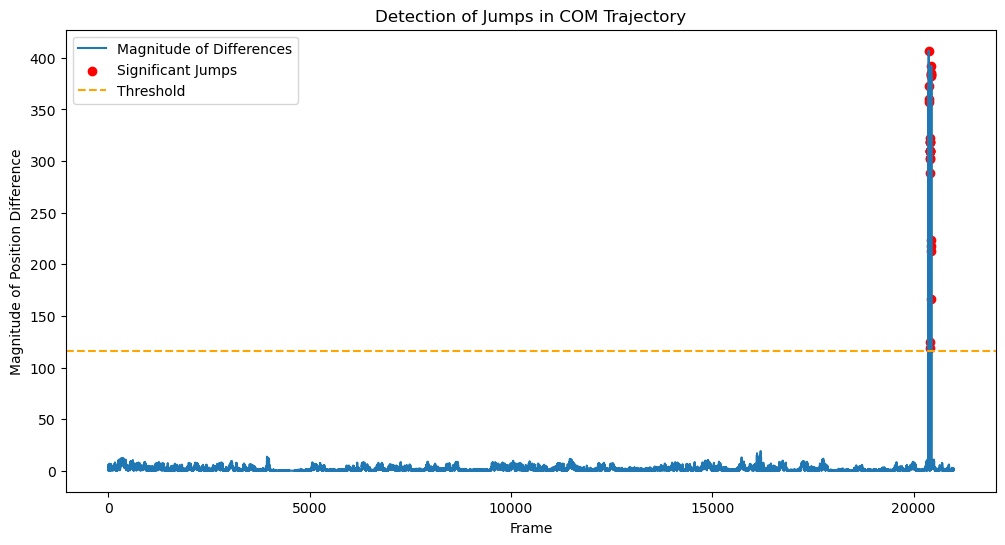

saved into npy. Frames with significant jumps: [20370 20372 20373 20375 20396 20397 20398 20399 20402 20403 20405 20406
 20407 20409 20410 20411 20417 20419 20427 20428 20432 20433 20434 20435
 20437 20438 20439]
27
N_FRAMES 27
pred_2d 27


100%|██████████| 27/27 [00:08<00:00,  3.24it/s]


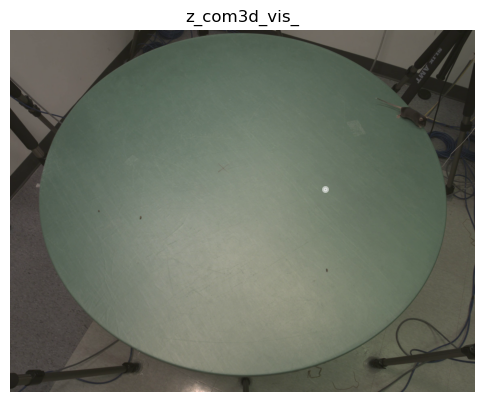

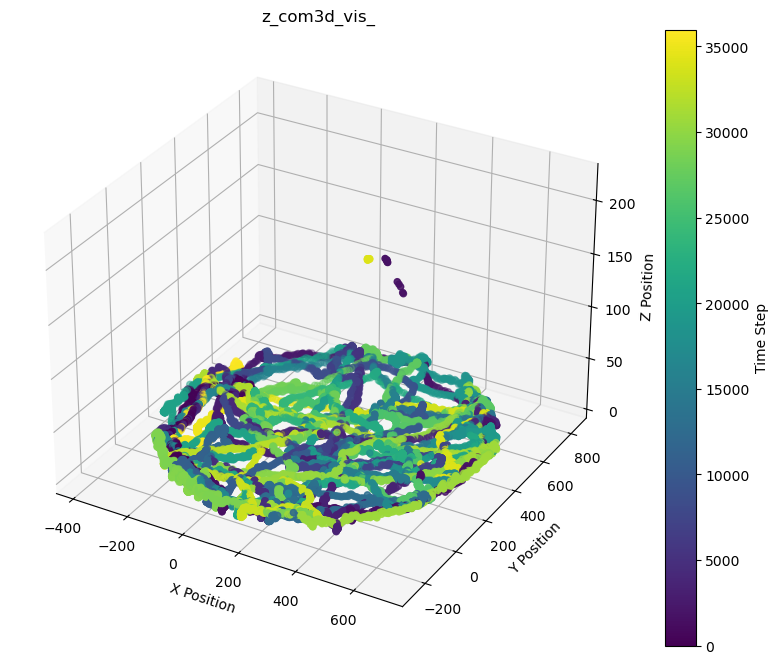

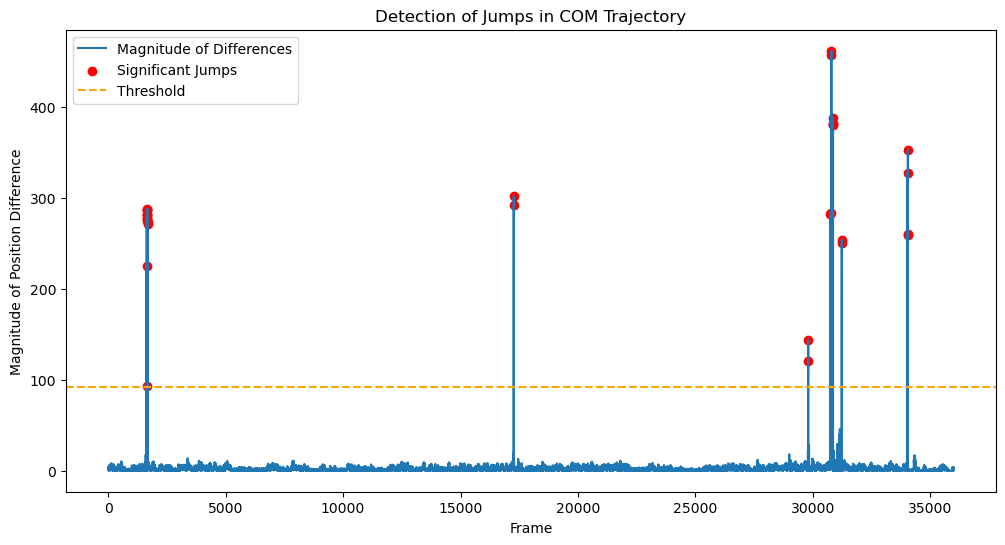

saved into npy. Frames with significant jumps: [ 1639  1640  1642  1647  1649  1666  1667  1668  1669  1670  1671  1686
  1688 17263 17264 29801 29802 30749 30751 30787 30788 30844 30845 30856
 30857 31227 31229 34030 34035 34036 34044]
31
N_FRAMES 31
pred_2d 31


100%|██████████| 31/31 [00:18<00:00,  1.71it/s]


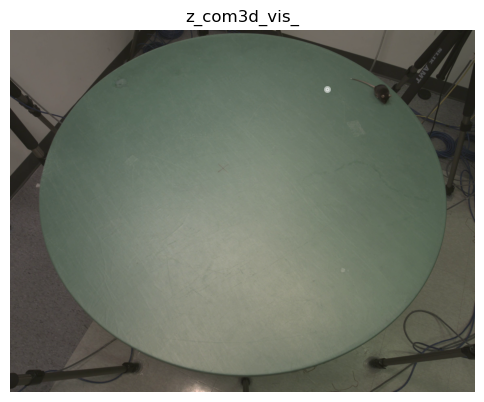

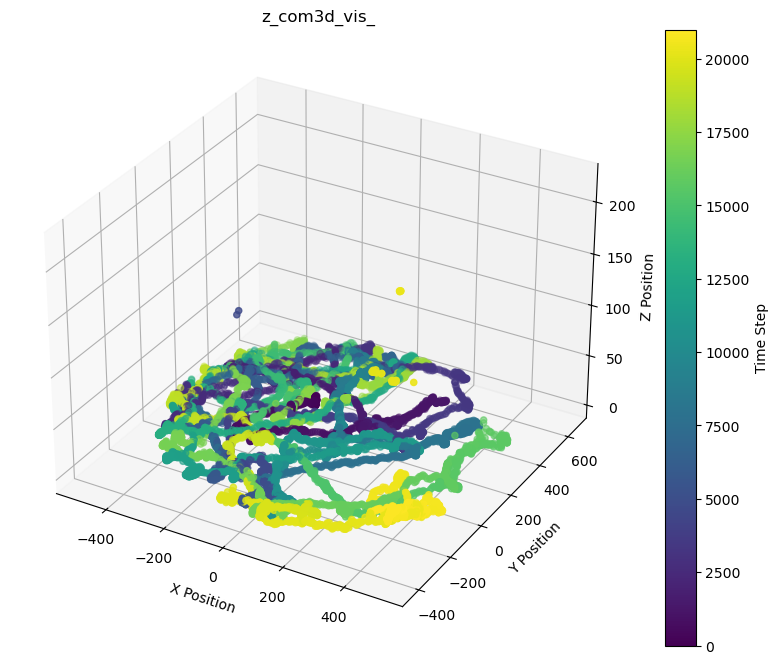

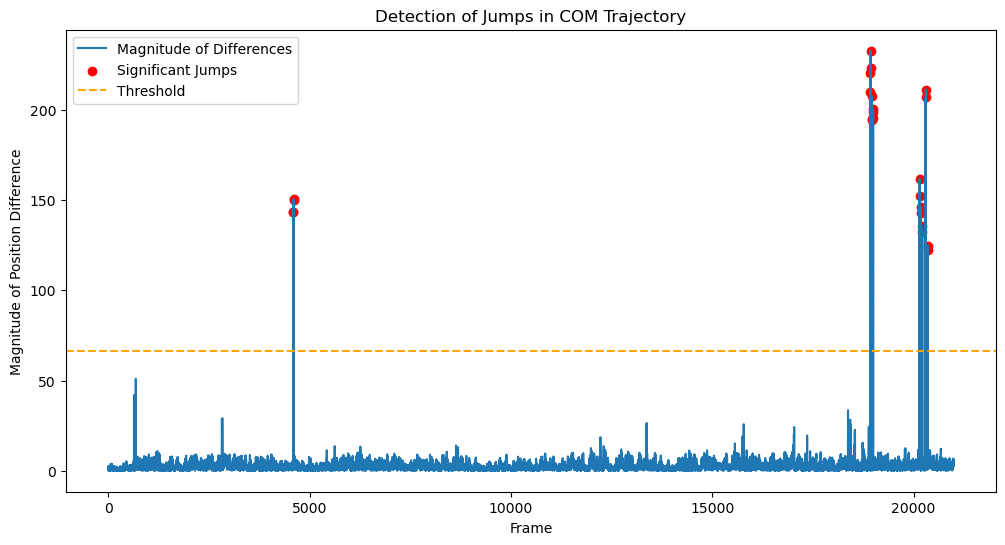

saved into npy. Frames with significant jumps: [ 4597  4598  4603  4604 18923 18927 18928 18930 18963 18973 18974 18990
 18992 18993 20147 20155 20171 20173 20206 20214 20299 20303 20348 20349]
24
N_FRAMES 24
pred_2d 24


100%|██████████| 24/24 [00:14<00:00,  1.71it/s]


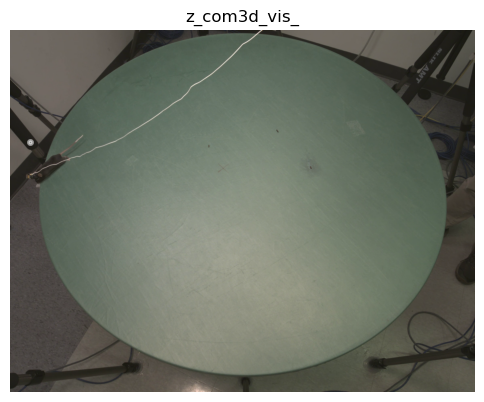

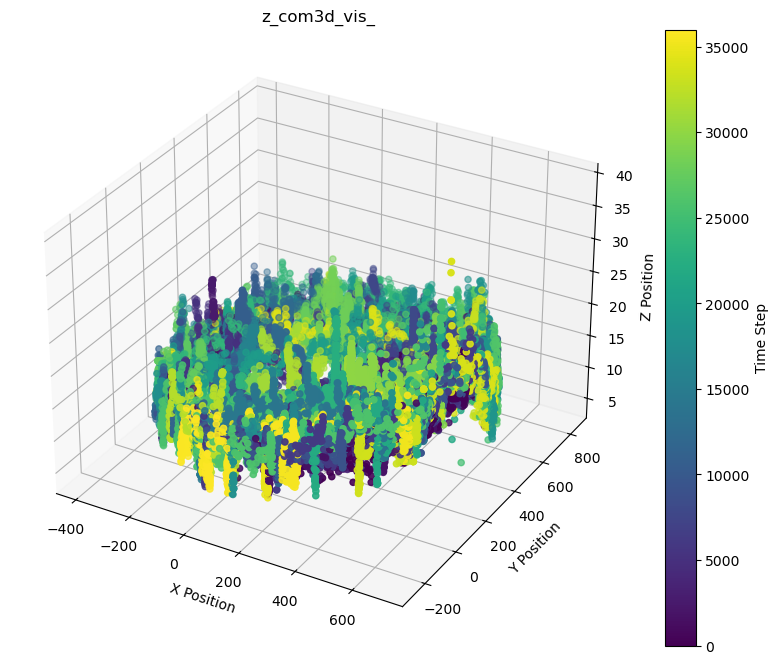

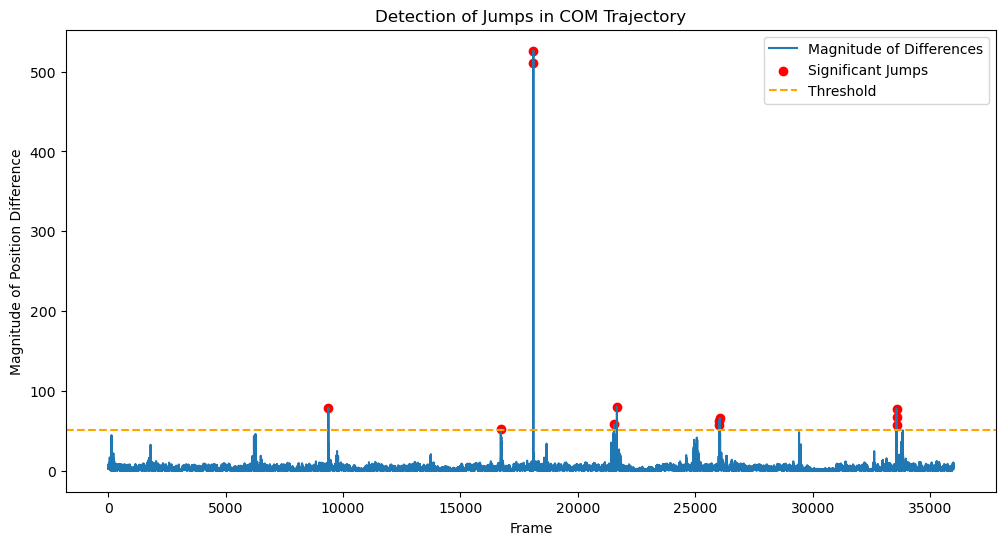

saved into npy. Frames with significant jumps: [ 9375 16717 18102 18103 21541 21660 26009 26010 26047 33571 33579 33582]
12
N_FRAMES 12
pred_2d 12


100%|██████████| 12/12 [00:13<00:00,  1.16s/it]


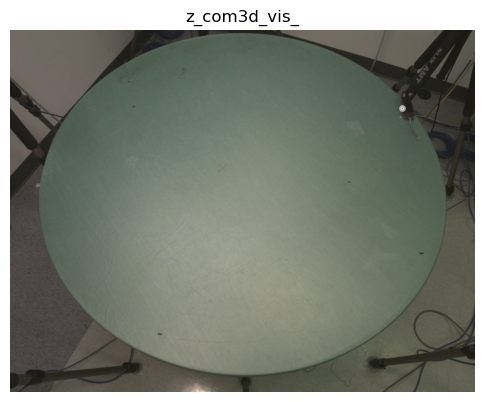

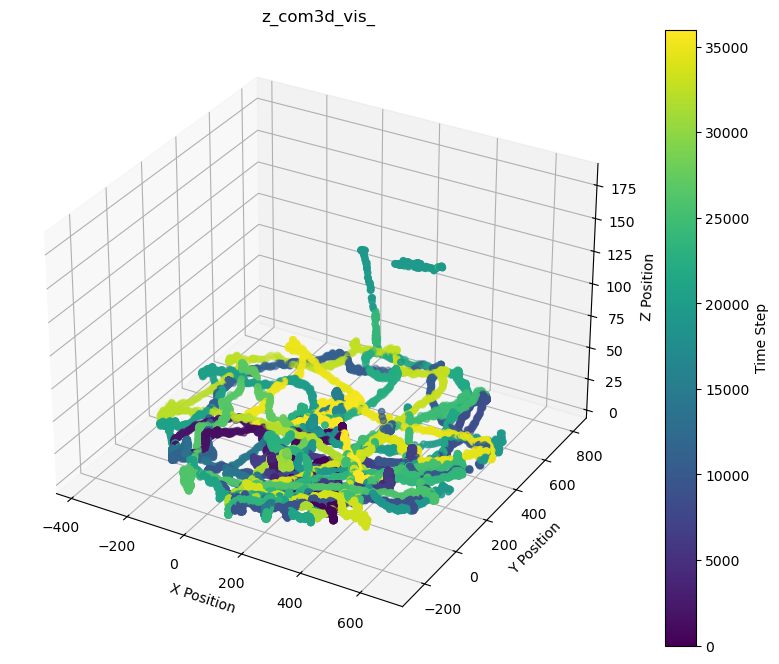

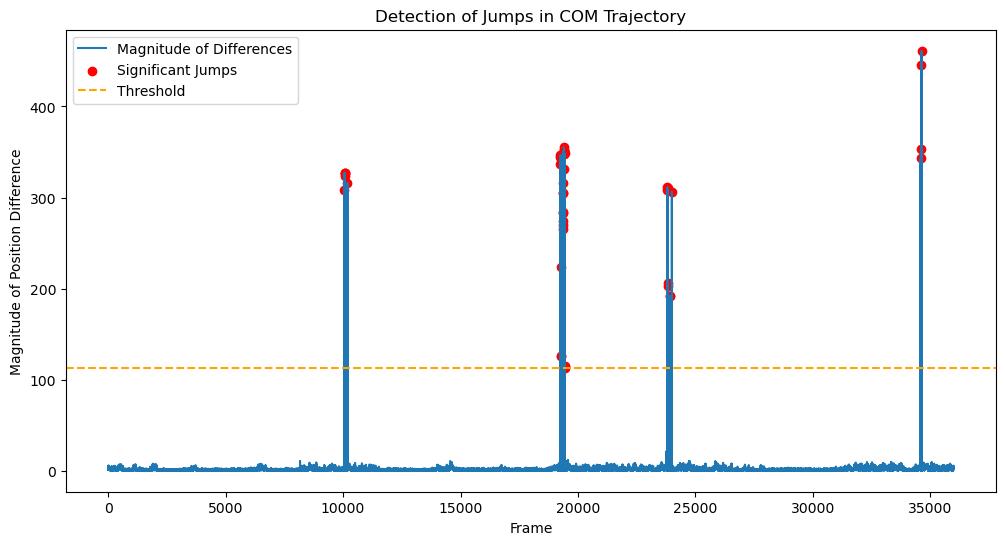

saved into npy. Frames with significant jumps: [10055 10062 10065 10066 10072 10187 19251 19256 19257 19279 19280 19294
 19357 19358 19359 19360 19361 19364 19365 19366 19388 19389 19393 19394
 19399 19405 19406 19407 19410 19411 19429 19431 19440 19441 23811 23812
 23813 23815 23817 23931 23934 23997 34592 34599 34625 34627]
46
N_FRAMES 46
pred_2d 46


100%|██████████| 46/46 [00:23<00:00,  1.98it/s]


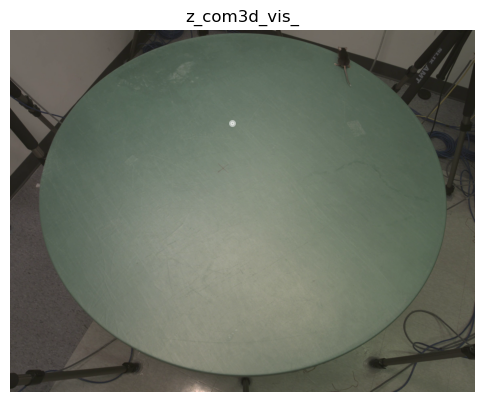

In [3]:
weired_folders = [
    # "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_caffeine_1448",
    # "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1051",
    # "/home/lq53/mir_data/24summ/2024_07_10/1691485_no_hole_habituation_13_59"
    # "/home/lq53/mir_data/24summ/2024_06_26/1686940_left"
    # base_paths = [ 
    # below 3 need to process from strach.
    # '/home/lq53/mir_data/24summ/2024_06_26/1686940_left', #validation set
    # '/home/lq53/mir_data/24summ/2024_06_28/1686941_left_right_2', 
    # '/home/lq53/mir_data/24summ/2024_07_12/240605PMC1_right_hole_11_27',
    # # labels
    "/home/lq53/mir_data/24summ/2024_07_10/1691485_no_hole_habituation_13_59",
    "/home/lq53/mir_data/24summ/2024_07_11/1691485BMCFF1505",
    "/home/lq53/mir_data/24summ/2024_07_10/1691485_left_hole_saline_10_35",
    "/home/lq53/mir_data/24summ/2024_07_03/1691486_left_right_habituation",
    "/home/lq53/mir_data/24summ/2024_07_19/240605PMC_window2_right2holes_12_14",
    #below are my labels.
    # "/home/lq53/mir_data/24summ/2024_07_03/1691486_left_right_habituation",
    # "/home/lq53/mir_data/24summ/2024_07_12/240605PMC1_right_hole_11_27" #this one did not work
    "/home/lq53/mir_data/24summ/2024_07_16/1691485RMHBN1405",
    "/home/lq53/mir_data/24summ/2024_07_15/1691485RMPBS1659",
    "/home/lq53/mir_data/24summ/2024_07_19/240605PMC_window2_right2holes_11_30",
    "/home/lq53/mir_data/24summ/2024_07_15/1691485RMHBN1425",
    "/home/lq53/mir_data/24summ/2024_07_15/1691485RMPBF1531"
    # 'G:\\Videos\\6cam\\lq53\\Mir_intrinsics\\pyxy3d_noT'
    # '/n/olveczky_lab_tier1/Lab/dannce_rig2/data/M1-M7_photometry/Alone', SYNTAX_ERROR_UPDATE_THIS_WITH_YOUR_OWN_FILES
    # '/n/holylabs/LABS/olveczky_lab/Lab/dannce-dev/hannah-data/COM_DANNCE_TRAINING'
# ]
]

for wie in weired_folders:
    # note that there exist a function plot_com_all which i wrote before that can easily do below, 
    # but for somereason i used this just that we can be a bit more flexible in terms of the name of the folders and stuff...

    # /home/lq53/mir_data/24summ/2024_06_26/1686940_left/COM_df/predict_results//vis/vis_combined_Camera2_1000_from_0.mp4
    com_foler = os.path.join(wie, 'COM_df_final/predict_results')
    com_path = os.path.join(com_foler, 'com3d.mat')   
    com_folder_save = os.path.join(com_foler, 'vis')
    if not os.path.exists(com_folder_save):
        os.makedirs(com_folder_save)
    graph_title = "z_com3d_vis_"
    
    com_data = load_data(com_path)

    plot_3d_trajectory(com_data, graph_title, com_folder_save)
    jump_indices = detect_jumps(com_data, com_folder_save)

    # # # produce video, which is not necessary if not labeling more com to detect what's wrong


    save_path = com_folder_save # os.path.join(com_foler, 'vis') #os.path.join(pred_path, 'vis')
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    base_folder = wie
    base_base_folder = os.path.dirname(base_folder)
    generate_jump_video(com_data, base_folder, jump_indices, graph_title, save_path, cam='Camera1')
    # generate_com_video(com_data, base_folder, graph_title, save_path, cam='Camera1')
# generate_com_video_choice # without that much things, just generate. quick iteration made for one click pipeline...

    